In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
type(df.age)

pandas.core.series.Series

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(1338, 7)

In [7]:
df.query("bmi<26.29").shape

(334, 7)

In [8]:
1338/4

334.5

Text(0.5,1,'Histogram of BMI')

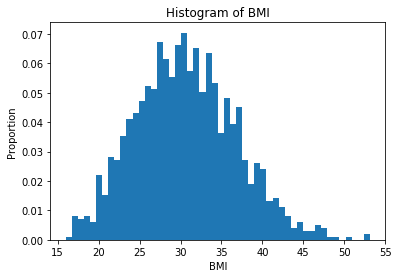

In [40]:
df.bmi.plot.hist(bins = 50, normed = True)
plt.xlabel("BMI")
plt.ylabel("Proportion")
plt.title("Histogram of BMI")

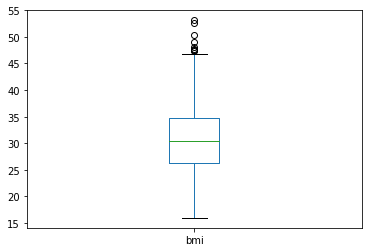

In [41]:
df.bmi.plot.box()

In [42]:
q1, q2, q3 = np.percentile(df.bmi,  [25, 50, 75])
q1, q2, q3

(26.29625, 30.4, 34.69375)

In [43]:
iqr = q3 - q1
iqr

8.3975

In [44]:
upper_whisk = np.min([np.max(df.bmi), q3 + 1.5 * iqr])
lower_whisk = np.min([np.max(df.bmi), q1 - 1.5 * iqr])
upper_whisk, lower_whisk

(47.290000000000006, 13.7)

In [45]:
outliers = np.where((df.bmi > upper_whisk) | (df.bmi < lower_whisk), 1, 0)
pd.Series(outliers).value_counts()

0    1329
1       9
dtype: int64

In [46]:
df[outliers == 1]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


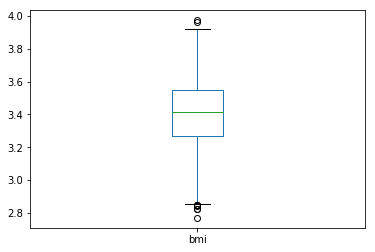

In [48]:
np.log(df.bmi).plot.box()

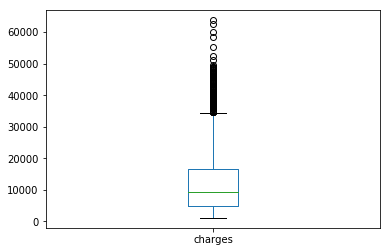

In [49]:
df.charges.plot.box()

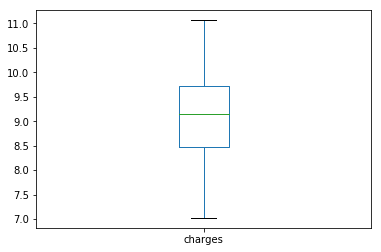

In [51]:
np.log(df.charges).plot.box()

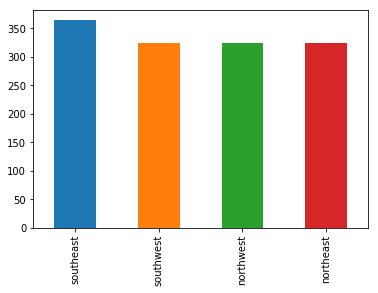

In [54]:
df.region.value_counts().plot.bar()

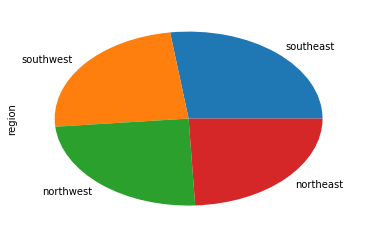

In [55]:
df.region.value_counts().plot.pie()

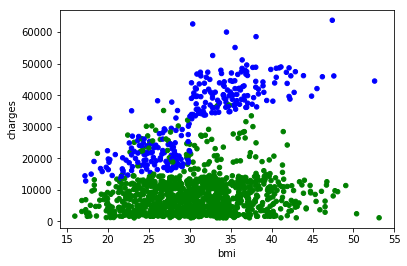

In [60]:
colors = np.where(df.smoker == "yes", "blue", "green")
df.plot.scatter("bmi", "charges", color = colors)

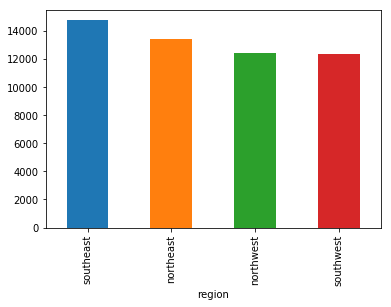

In [64]:
df.groupby("region").charges.mean().sort_values(ascending = False).plot.bar()

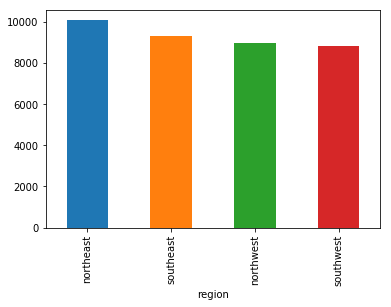

In [68]:
df.groupby("region").charges.median().sort_values(ascending = False).plot.bar()

In [65]:
a = np.array([10, 12, 10, 15, 100])
np.mean(a), np.median(a)

(29.4, 12.0)

In [66]:
b = a[:-1]

In [67]:
np.mean(b), np.median(b)

(11.75, 11.0)

In [72]:
import seaborn as sns

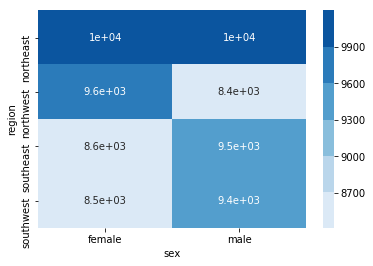

In [76]:
agg = df.groupby(["region", "sex"]).charges.median().unstack()
sns.heatmap(agg, annot=True, cmap=sns.color_palette("Blues"))